<a href="https://colab.research.google.com/github/Shahzodgithub/Business-share-in-Uzbekistan/blob/main/Business_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O'zbekistonda 2000-2020 yillar uchun 'Kichik biznes va xususiy tadbirkorlikning ulushi(% da)'**

Kichik biznes va xususiy tadbirkorlikning 2000-2020 yillar uchun YaIM,Sanoat, Qurilish, Bandlik, Eksport va Import tarkibidagi ulushi tahlil qilindi

*By: Shakhzod Pardaboev*

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [262]:
df = pd.read_csv("https://raw.githubusercontent.com/Shahzodgithub/uz-population-revenue/main/business-uzb.csv",index_col=0)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
Kichik biznes va xususiy tadbirkorlikning ulushi,,,,,,,
(umumiy hajmga nisbatan % da),NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yil,YaIM,Sanoat,Qurilish,Bandlik,Eksport,Import,NaN
2000,"31,0*","12,9*","38,4*","49,7*",10.2,22.8,NaN
2001,"33,8*","12,5*","40,4*","51,8*",9.3,26.7,NaN
2002,"34,6*","15,4*","42,0*","53,5*",7.5,24.9,NaN
2003,35,10.8,39.9,56.7,7.3,33.7,NaN
2004,35.6,11,49.6,60.3,7.3,32.7,NaN
2005,38.2,10,50.9,64.8,6,33.7,NaN


In [263]:
# changed the cols and rows (transportation)
df1 = df.T
df1

Kichik biznes va xususiy tadbirkorlikning ulushi,(umumiy hajmga nisbatan % da),NaN,Yil,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN,*) Kichik va o`rta biznes,**) 2010-2019 yillar uchun ma'lumotlar aniqlik kiritilgan (qayta baholab chiqilgan) \nma'lumotlarni hisobga olgan holda keltirilgan,NaN,NaN
Unnamed: 1,NaN,NaN,YaIM,"31,0*","33,8*","34,6*",35,35.6,38.2,42.1,45.7,48.2,50.1,"60,8**","61,9**","60,8**","60,9**","61,9**","64,6**","66,8**","65,3**","62,4**","56,0**",55.7,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,NaN,NaN,Sanoat,"12,9*","12,5*","15,4*",10.8,11,10,10.9,13.2,14.6,17.9,26.6,28.6,29.7,33,36.8,40.6,45.3,41.2,37.4,25.8,27.93858538145,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,Qurilish,"38,4*","40,4*","42,0*",39.9,49.6,50.9,52.1,55.4,58.4,42.4,52.5,67.6,70,70.6,69.5,66.7,66.9,64.8,73.2,75.8,72.5,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,Bandlik,"49,7*","51,8*","53,5*",56.7,60.3,64.8,69.1,72.1,73.1,73.9,74.3,75.1,75.6,76.7,77.6,77.9,78.2,78,76.3,76.2,74.534851765816,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,NaN,NaN,Eksport,10.2,9.3,7.5,7.3,7.3,6,11.2,14.8,12.4,14.6,13.7,18.8,14,26.2,27,27,26,22,27.2,27,20.532986449388,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,NaN,NaN,Import,22.8,26.7,24.9,33.7,32.7,33.7,34.2,32,35.7,42.5,35.8,34.3,38.6,42.4,45.4,44.5,46.8,53.6,56.2,61.6,51.731920642463,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
#drop some nan values and columns
df1.columns = ['1990','1991','Yil','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','1992','1993','1994','1995','1996']
df1.drop(['1990','1991','1992','1993','1994','1995','1996'],axis=1,inplace=True)
df2 = df1.set_index('Yil').T
df2.columns = ['YaIM', 'Sanoat', 'Qurilish', 'Bandlik', 'Eksport', 'Import', "NaN"]
df2.drop('NaN',axis=1,inplace=True)

In [265]:
# here many additional characters and need to pull only numbers on good format
df2.values

array([['31,0*', '12,9*', '38,4*', '49,7*', '10.2', '22.8'],
       ['33,8*', '12,5*', '40,4*', '51,8*', '9.3', '26.7'],
       ['34,6*', '15,4*', '42,0*', '53,5*', '7.5', '24.9'],
       ['35', '10.8', '39.9', '56.7', '7.3', '33.7'],
       ['35.6', '11', '49.6', '60.3', '7.3', '32.7'],
       ['38.2', '10', '50.9', '64.8', '6', '33.7'],
       ['42.1', '10.9', '52.1', '69.1', '11.2', '34.2'],
       ['45.7', '13.2', '55.4', '72.1', '14.8', '32'],
       ['48.2', '14.6', '58.4', '73.1', '12.4', '35.7'],
       ['50.1', '17.9', '42.4', '73.9', '14.6', '42.5'],
       ['60,8**', '26.6', '52.5', '74.3', '13.7', '35.8'],
       ['61,9**', '28.6', '67.6', '75.1', '18.8', '34.3'],
       ['60,8**', '29.7', '70', '75.6', '14', '38.6'],
       ['60,9**', '33', '70.6', '76.7', '26.2', '42.4'],
       ['61,9**', '36.8', '69.5', '77.6', '27', '45.4'],
       ['64,6**', '40.6', '66.7', '77.9', '27', '44.5'],
       ['66,8**', '45.3', '66.9', '78.2', '26', '46.8'],
       ['65,3**', '41.2', '64.8'

In [267]:
#fix values
def fix_values():
  for i in df2.columns:
    df2[i] = df2[i].map(lambda strg: float(strg.replace(',','.')[:4]))
fix_values()
df2

,YaIM,Sanoat,Qurilish,Bandlik,Eksport,Import
2000,31.0,12.9,38.4,49.7,10.2,22.8
2001,33.8,12.5,40.4,51.8,9.3,26.7
2002,34.6,15.4,42.0,53.5,7.5,24.9
2003,35.0,10.8,39.9,56.7,7.3,33.7
2004,35.6,11.0,49.6,60.3,7.3,32.7
2005,38.2,10.0,50.9,64.8,6.0,33.7
2006,42.1,10.9,52.1,69.1,11.2,34.2
2007,45.7,13.2,55.4,72.1,14.8,32.0
2008,48.2,14.6,58.4,73.1,12.4,35.7
2009,50.1,17.9,42.4,73.9,14.6,42.5


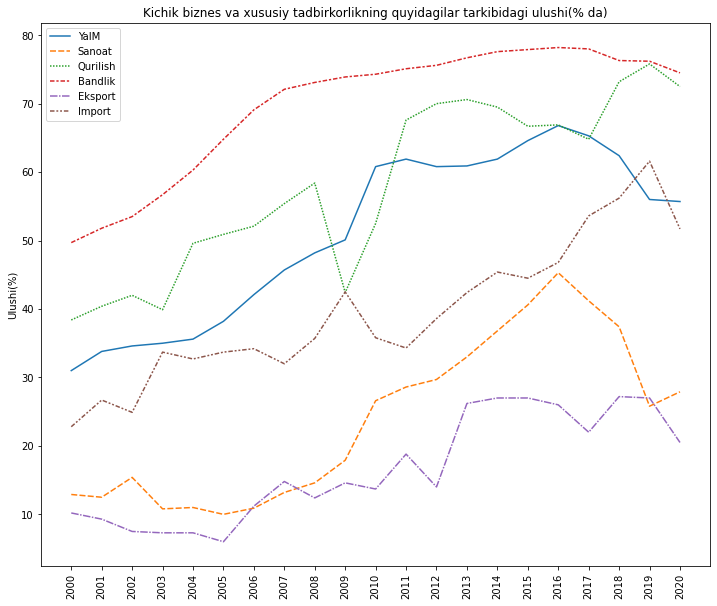

In [268]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df2)
plt.title('Kichik biznes va xususiy tadbirkorlikning quyidagilar tarkibidagi ulushi(% da)')
plt.ylabel('Ulushi(%)')
plt.xticks(rotation=90)
plt.show()

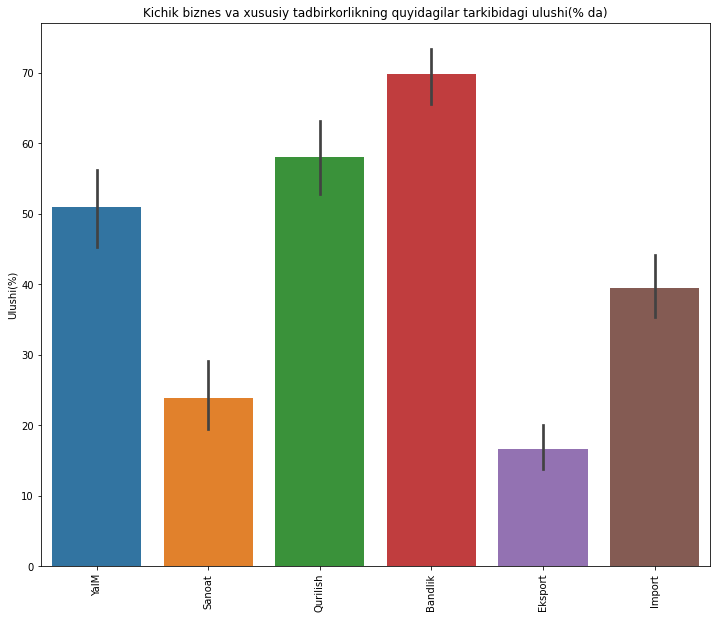

In [269]:
plt.figure(figsize=(12,10))
sns.barplot(data=df2)
plt.title('Kichik biznes va xususiy tadbirkorlikning quyidagilar tarkibidagi ulushi(% da)')
plt.ylabel('Ulushi(%)')
plt.xticks(rotation=90)
plt.show()

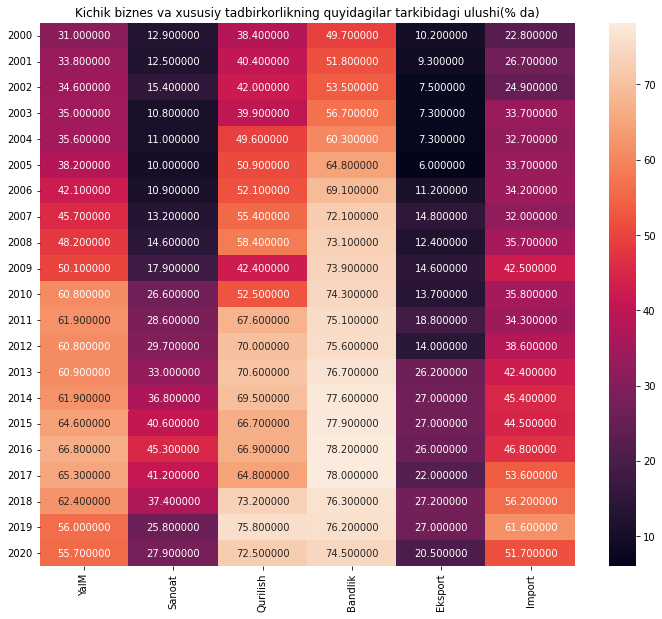

In [275]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df2,annot=True, fmt="f")
plt.title('Kichik biznes va xususiy tadbirkorlikning quyidagilar tarkibidagi ulushi(% da)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

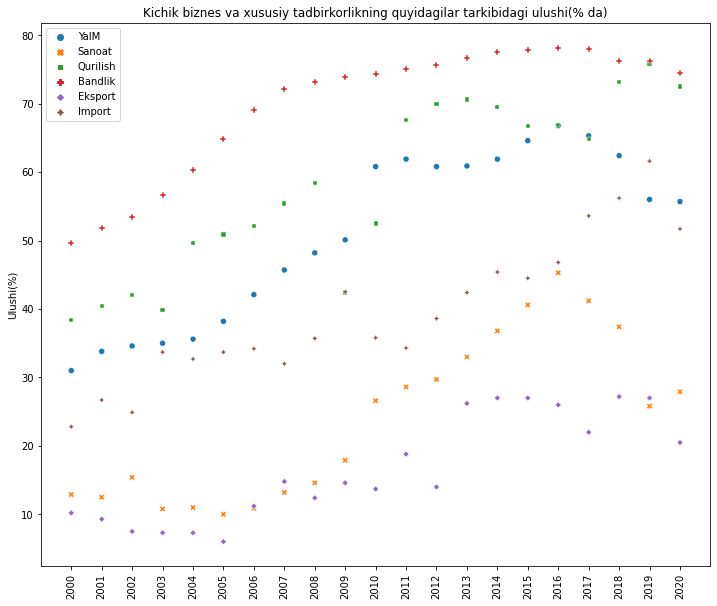

In [271]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df2)
plt.title('Kichik biznes va xususiy tadbirkorlikning quyidagilar tarkibidagi ulushi(% da)')
plt.ylabel('Ulushi(%)')
plt.xticks(rotation=90)
plt.show()

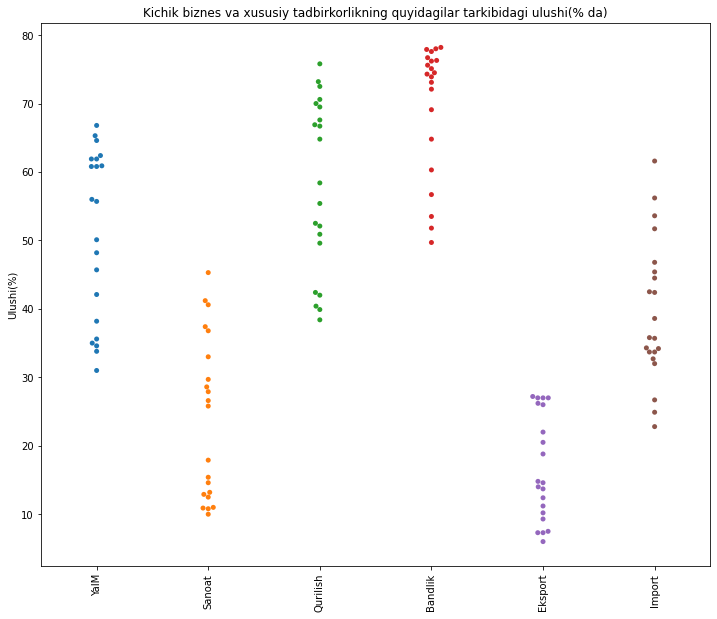

In [272]:
plt.figure(figsize=(12,10))
sns.swarmplot(data=df2)
plt.title('Kichik biznes va xususiy tadbirkorlikning quyidagilar tarkibidagi ulushi(% da)')
plt.ylabel('Ulushi(%)')
plt.xticks(rotation=90)
plt.show()

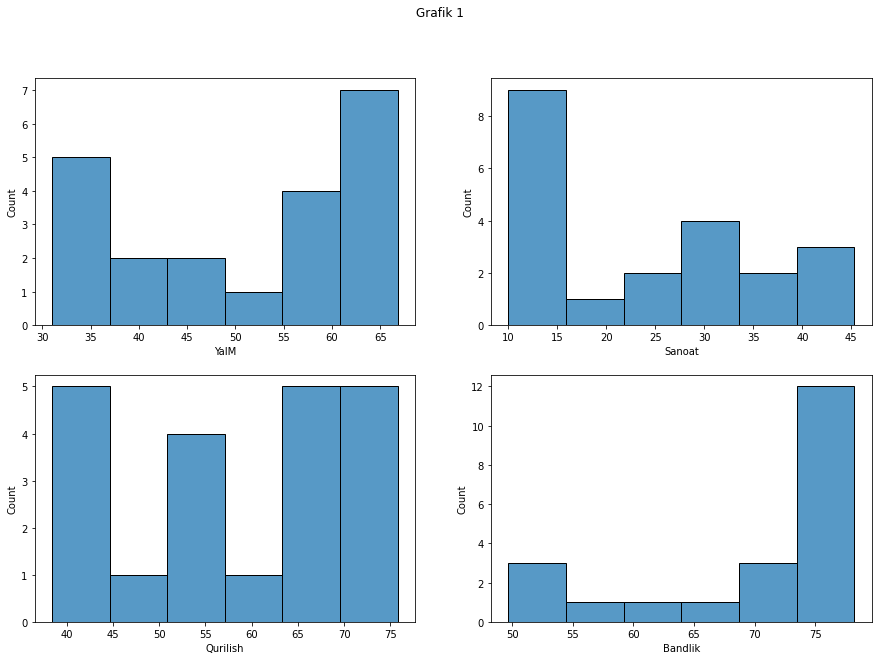

In [274]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0, 0], data=df2, x='YaIM')
sns.histplot(ax=ax[0, 1], data=df2, x='Sanoat')
sns.histplot(ax=ax[1, 0], data=df2, x='Qurilish')
sns.histplot(ax=ax[1, 1], data=df2, x='Bandlik')
plt.show()